# Natural Language Processing Tutorial (NLP101) - Level Beginner

## Getting the Data

In [1]:
from pycaret.datasets import get_data
data = get_data('kiva')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [2]:
#check the shape of data
data.shape

(6818, 7)

In [3]:
# sampling the data to select only 1000 documents
data = data.sample(1000, random_state=786).reset_index(drop=True)
data.shape

(1000, 7)

## Setting up Environment in PyCaret

In [4]:
from pycaret.nlp import *
exp_nlp101 = setup(data = data, target = 'en', session_id = 123)

Description,Value
session_id,123
Documents,1000
Vocab Size,4615
Custom Stopwords,False


## Create a Topic Model

In [6]:
lda = create_model('lda')
print(lda)

LdaModel(num_terms=4615, num_topics=4, decay=0.5, chunksize=100)


## Assign a Model

In [7]:
lda_results = assign_model(lda)
lda_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Kenya,praxide marry child primary school train tailo...,F,75,partner,Services,0,0.169807,0.007742,0.821979,0.000473,Topic 2,0.82
1,Kenya,gynaecology practitioner run year old life wif...,M,1200,partner,Health,0,0.004903,0.335249,0.659392,0.000456,Topic 2,0.66
2,Dominican Republic,live child boy girl range year old sell new us...,F,150,partner,Clothing,0,0.522154,0.099909,0.377378,0.000559,Topic 0,0.52
3,Kenya,phanice marry child daughter secondary school ...,F,150,lender,Services,1,0.051998,0.105731,0.841687,0.000585,Topic 2,0.84
4,Kenya,year old hotel last year get good return compe...,F,300,lender,Food,1,0.199125,0.007041,0.793332,0.000501,Topic 2,0.79


## Plot a Model

### Frequency Distribution of Entire Corpus

In [8]:
plot_model()

### Top 100 Bigrams on Entire Corpus

In [9]:
plot_model(plot = 'bigram')

### Frequency Distribution of Topic 1

In [10]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

### Topic Distribution

In [11]:
plot_model(lda, plot = 'topic_distribution')

### T-distributed Stochastic Neighbor Embedding (t-SNE)

In [12]:
plot_model(lda, plot = 'tsne')

### Uniform Manifold Approximation and Projection Plot

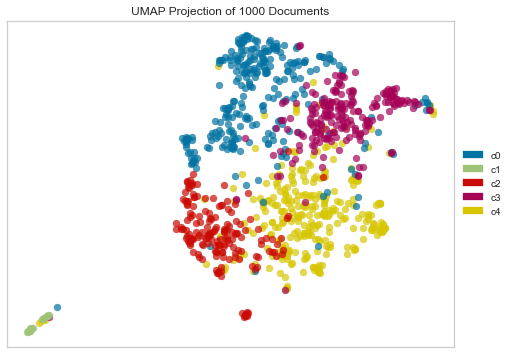

In [13]:
plot_model(lda, plot = 'umap')

### Evaluate Model

In [14]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

## Saving & loading the model

In [15]:
save_model(lda,'Final LDA Model 08Feb2020')

Model Succesfully Saved


(<gensim.models.ldamodel.LdaModel at 0x1f6d7e34c88>,
 'Final LDA Model 08Feb2020.pkl')

In [16]:
saved_lda = load_model('Final LDA Model 08Feb2020')

Model Sucessfully Loaded


In [17]:
print(saved_lda)

LdaModel(num_terms=4615, num_topics=4, decay=0.5, chunksize=100)


What we have covered in this tutorial is the entire workflow for Natural Language Processing experiment. Our task today was to create and analyze a topic model. We have performed several text pre-processing steps using setup() then we have created a topic model using create_model(), assigned topics to the dataset using assign_model() and analyze the results using plot_model(). All this was completed in less than 10 commands that are naturally constructed and very intuitive to remember. Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code.

In this tutorial, we have only covered basics of pycaret.nlp. In the next tutorial we will demonstrate the use of tune_model() to automatically select the number of topics for a topic model. We will also go deeper into few concepts and techniques such as custom_stopwords to improve the result of a topic model.

# Natural Language Processing Tutorial (NLP102) - Level Intermediate

Welcome to Natural Language Processing Tutorial (NLP102). This tutorial assumes that you have completed Natural Language Processing Tutorial (NLP101) - Level Beginner. If you haven't we strongly recommend you to go back and progress through the beginner's tutorial as several key concepts that we aim to cover in this tutorial are inter-connected with Beginner's Tutorial.

Building on the previous tutorial, we will learn the following in this tutorial:

Custom Stopwords: How to define custom stopwords?

Evaluate Topic Model: How to evaluate performance of a topic model?

Hyperparameter Tuning: How to tune hyperparameter (# of topics) for a topic model?

Experiment Logging: How to log experiments in PyCaret using MLFlow backend

In [18]:
# This follows the first tutorial so loading data and importing module sis not being repeated
exp_nlp102 = setup(data = data, target = 'en', session_id = 123,
                   custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                       'child', 'school'],
                   log_experiment = True, experiment_name = 'kiva1')

Description,Value
session_id,123
Documents,1000
Vocab Size,4636
Custom Stopwords,True


In [20]:
lda = create_model('lda')
plot_model(lda, plot = 'topic_distribution')

## Intrinsic Evaluation using Coherence Value

In [21]:
tuned_unsupervised = tune_model(model = 'lda', multi_core = True)

IntProgress(value=0, description='Processing: ', max=25)

Output()

Best Model: Latent Dirichlet Allocation | # Topics: 400 | Coherence: 0.486


## Extrinsic Evaluation using Classifier

In [22]:
tuned_classification = tune_model(model = 'lda', multi_core = True, supervised_target = 'status')

IntProgress(value=0, description='Processing: ', max=25)

Output()

Best Model: Latent Dirichlet Allocation | # Topics: 100 | Accuracy : 0.866


We have covered several key concepts in this tutorial such as model evaluation using intrinsic and extrinsic technique. In next tutorial. We have performed several text pre-processing steps including removal of custom_stopwords using setup() then we have created a topic model and compared the results with the one we created in last tutorial. We have also talked about different ways to evaluate topic model and have used tune_model() to evaluate coherence value of a LDA model. We have also used tune_model() to evaluate number of topics in a supervised setting (in this case we have used it to build a classifier to predict loan status).